# Question 3

In [18]:
# imports and setup

import scipy as sc
import numpy as np

import pandas as pd
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from IPython.display import Video

import matplotlib.pyplot as plt
%matplotlib inline  
plt.rcParams['figure.figsize'] = (10, 6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

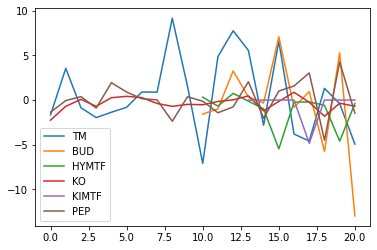

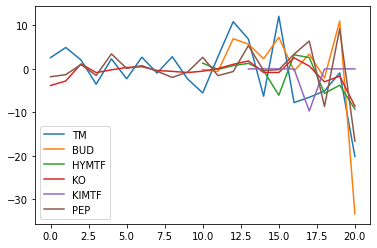

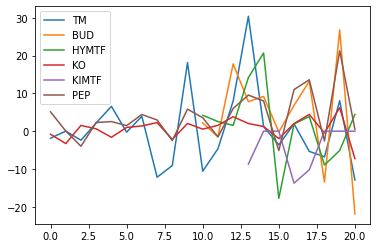

In [11]:
dat1 = pd.read_csv('../DataMadness/DataSets/Delta.csv')
dat2 = pd.read_csv('../DataMadness/DataSets/Delta2.csv')
dat3 = pd.read_csv('../DataMadness/DataSets/Delta3.csv')
dat1.plot()
dat2.plot()
dat3.plot()

,TM,BUD,HYMTF,KO,KIMTF,PEP
Date,,,,,,
2000-01-01,65.823446,NaN,NaN,16.999266,NaN,21.394844
2000-02-01,64.154686,NaN,NaN,14.746034,NaN,20.035555
2000-03-01,68.419276,NaN,NaN,13.180083,NaN,19.588661
2000-04-01,76.415589,NaN,NaN,13.570076,NaN,21.826216
2000-05-01,72.327733,NaN,NaN,14.102745,NaN,23.116704
...,...,...,...,...,...,...
2020-08-01,128.210003,56.670000,34.930000,46.995690,30.299999,134.791809
2020-09-01,132.949997,56.320000,35.660000,48.659983,30.299999,133.696425
2020-10-01,131.550003,55.800001,35.645000,48.625823,30.299999,135.849727


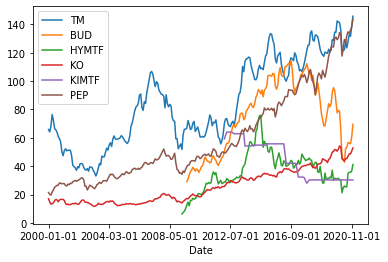

In [17]:
all_dat = pd.read_csv('../DataMadness/DataSets/All_Companies.csv')
all_dat = all_dat.set_index('Date')
all_dat.plot()


In [36]:
ad = pd.read_csv('../DataMadness/DataSets/superbowl-ads(sorted).csv')
ad = ad.drop(['superbowl_ads_dot_com_url','youtube_url'],axis=1)
ad = ad.set_index('year')
ad = ad[(ad['brand'] != 'E-Trade') & (ad['brand'] != 'NFL')]
ad

,brand,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex
year,,,,,,,,
2000,Budweiser,True,True,False,False,False,False,False
2000,Bud Light,True,True,False,False,True,False,False
2000,Budweiser,True,False,False,False,False,True,False
2000,Bud Light,True,False,False,False,True,True,True
2000,Budweiser,True,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2020,Kia,False,False,False,True,False,False,False
2020,Hynudai,True,True,False,True,False,True,False
2020,Budweiser,False,True,True,True,True,False,False


In [62]:
name = ad.drop_duplicates(subset=['brand'])
d = ['BUD','BUD','PEP','PEP','TM','KO','HYMTF','KIMTF']
stock_name = pd.Series(data=d, index=name['brand'])
print(stock_name)
def stock(name):
    return stock_name.loc[name]
ad['stock_name'] = ad['brand'].map(stock)
ad

brand
Budweiser      BUD
Bud Light      BUD
Pepsi          PEP
Doritos        PEP
Toyota          TM
Coca-Cola       KO
Hynudai      HYMTF
Kia          KIMTF
dtype: object


,brand,funny,show_product_quickly,patriotic,celebrity,danger,animals,use_sex,stock_name
year,,,,,,,,,
2000,Budweiser,True,True,False,False,False,False,False,BUD
2000,Bud Light,True,True,False,False,True,False,False,BUD
2000,Budweiser,True,False,False,False,False,True,False,BUD
2000,Bud Light,True,False,False,False,True,True,True,BUD
2000,Budweiser,True,True,False,False,False,False,False,BUD
...,...,...,...,...,...,...,...,...,...
2020,Kia,False,False,False,True,False,False,False,KIMTF
2020,Hynudai,True,True,False,True,False,True,False,HYMTF
2020,Budweiser,False,True,True,True,True,False,False,BUD
